In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [333]:
datafile = '3-Airplane_Crashes_Since_1908.txt'
df = pd.read_table(datafile, sep=',', parse_dates=False)
df['Crash'] = 1
df.head()
# Parse in data

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Crash
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,0,"During a demonstration flight, a U.S. Army fly...",1
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,5,0,First U.S. dirigible Akron exploded just offsh...,1
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1,1,0,The first fatal airplane accident in Canada oc...,1
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,14,0,The airship flew into a thunderstorm and encou...,1
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30,30,0,Hydrogen gas which was being vented was sucked...,1


## A)
How many planes crashed yearly?
How many people were on board? 
How many survived? 
How many died?

In [334]:
def  toInt(x) :
    y = str(x)
    z = y[-4:]
    z = int(z)
    return z

df['Year'] = df['Date'].apply(toInt)
# Cast an integer (Year) from datetime (Date)

In [335]:
YearVsDeaths = df.groupby('Year').sum()
# Groupby Year to count crashes, aboard, fatalities

([<matplotlib.axis.XTick at 0x126f2a890>,
 <a list of 11 Text xticklabel objects>)

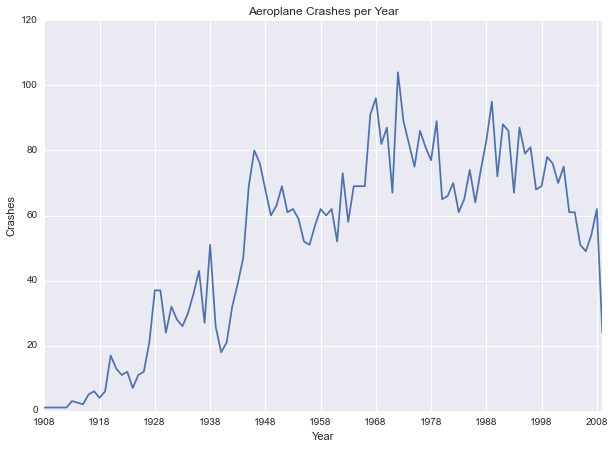

In [336]:
#plt.figure(figsize=(10, 7))
ax = YearVsDeaths['Crash'].plot(x_compat=True)
ax.set(xlabel='Year', ylabel='Crashes', title='Aeroplane Crashes per Year')
plt.xticks(np.arange(1908, 2009, 10))

([<matplotlib.axis.XTick at 0x126492a50>,
 <a list of 11 Text xticklabel objects>)

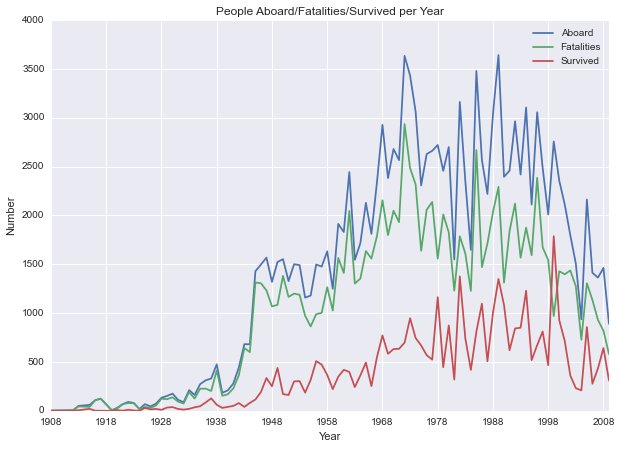

In [337]:
#plt.figure(figsize=(10, 7))
YearVsDeaths['Survived'] = YearVsDeaths['Aboard'] - YearVsDeaths['Fatalities']
ax = YearVsDeaths[['Aboard', 'Fatalities', 'Survived']].plot(x_compat=True)
ax.set(xlabel='Year', ylabel='Number', title='People Aboard/Fatalities/Survived per Year')
plt.xticks(np.arange(1908, 2009, 10))

In [338]:
YearVsDeaths['PoS'] = YearVsDeaths['Survived']/YearVsDeaths['Aboard']
# Proportion of passengers surviving = Survivors / All aboard

In [339]:
YearVsDeaths.head()

,Aboard,Fatalities,Ground,Crash,Survived,PoS
Year,,,,,,
1908,2,1,0,1,1,0.500000
1912,5,5,0,1,0,0.000000
1913,51,45,0,3,6,0.117647
1915,60,40,0,2,20,0.333333
1916,109,108,0,5,1,0.009174


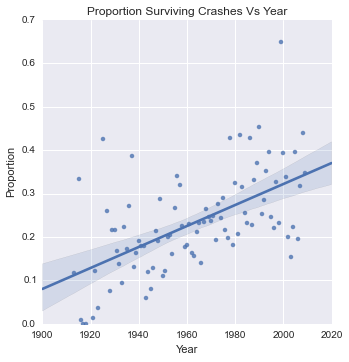

In [340]:
YearVsDeaths = YearVsDeaths[YearVsDeaths['Aboard'] > 50]
# Removing small samples
YearVsDeaths = YearVsDeaths.reset_index()

# Linear Regression to see line of best fit for proportion surviving vs time
ax = sns.lmplot(x='Year', y='PoS', data=YearVsDeaths)
ax.set(xlabel='Year', ylabel='Proportion', title='Proportion Surviving Crashes Vs Year', ylim=(0, 0.7))

## B)
Highest number of crashes by operator and type of aircrafts.

In [341]:
df.groupby('Operator').sum().head(10)


,Aboard,Fatalities,Ground,Crash,Year
Operator,,,,,
A B Aerotransport,17,3,0,2,3868
AB Aerotransport,64,58,0,3,5837
ACES Colombia,41,40,0,3,5963
ADC Airlines,160,97,0,2,4003
ADES Colombia,23,22,0,2,3986
AECA Cargo,4,4,49,1,1984
AIDA,16,14,0,1,1956
AIRES Colombia,27,27,0,2,3980
ALADA,16,16,0,1,1997


Need to remove duplicate strings (Operator)

Still some problems, AVIANCA != AVIANCA/AVIANCA and ATI != ATI Aircompany

In [348]:
import string
 
def normalize(s):
    s = str(s)
    for p in string.punctuation:
        s = s.replace(p, '')
        s = s.replace(' ','')
    return s.lower().strip()

df['Operator'] = df['Operator'].apply(normalize)
operator_df = df.groupby('Operator').sum()
sorted_df = operator_df.sort('Crash', ascending=False)
sorted_df = sorted_df[:10]
sorted_df
# Grouped by operator, sorted by highest number of crashes



,Aboard,Fatalities,Ground,Crash,Year
Operator,,,,,
aeroflot,8870,7156,28,179,353702
militaryusairforce,4549,3763,178,178,350323
airfrance,2874,1734,5,70,136651
deutschelufthansa,510,396,0,65,125836
militaryroyalairforce,1086,1049,2,58,113327
airtaxi,197,182,0,48,95271
chinanationalaviationcorporation,374,409,4,44,85457
unitedairlines,2460,1021,2753,44,86127
militaryusarmyairforces,1100,1070,80,43,83610


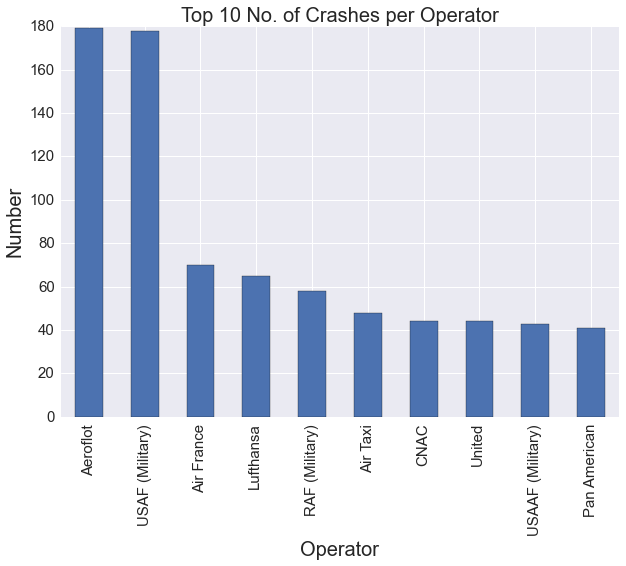

In [360]:
ax = sorted_df['Crash'].plot(kind='bar')
ax.set_xticklabels(['Aeroflot', 'USAF (Military)', 'Air France', 'Lufthansa','RAF (Military)','Air Taxi', 'CNAC','United','USAAF (Military)', 'Pan American'])
ax.set_ylabel('Number', fontsize=20)
ax.set_xlabel('Operator', fontsize=20)
ax.set_title('Top 10 No. of Crashes per Operator', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)